In [3]:
# Necesarry imports
import pandas as pd
from sklearn import svm, linear_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preparing the model

loading the dataset, extracting the features and learning a support vector machine

In [4]:
df = pd.read_csv("../data/Car.csv");

df.head()

,Unnamed: 0,choice,college,hsg2,coml5,type1,type2,type3,type4,type5,...,pollution3,pollution4,pollution5,pollution6,size1,size2,size3,size4,size5,size6
0,1,choice1,0,0,0,van,regcar,van,stwagon,van,...,0.25,0.25,0.50,0.50,3,3,2,2,3,3
1,2,choice2,1,1,1,regcar,van,regcar,stwagon,regcar,...,0.40,0.40,0.25,0.25,3,3,3,3,2,2
2,3,choice5,0,1,0,regcar,truck,regcar,van,regcar,...,0.40,0.40,0.75,0.75,2,2,3,3,3,3
3,4,choice5,0,0,1,regcar,truck,regcar,van,regcar,...,0.25,0.25,0.60,0.60,2,2,3,3,3,3
4,5,choice5,0,1,0,regcar,truck,regcar,van,regcar,...,0.40,0.40,0.75,0.75,1,1,2,2,3,3


In [5]:
# Utility functions
def extract_choice(choice: str) -> str:
  return choice[-1]

def row_choice(row: pd.Series) -> str:
  return extract_choice(row["choice"])

In [6]:
# Find out Y which is basically the size of each car that was selected
def extract_chosen(row: pd.Series, field: str) -> str | int | float:
  """
    Extracts the chosen answer for a specific field, so that if the row["choice"] is equal to for example 4,
    the row value at "{field}4" would be returned, this is useful for the parsing of a target value 
  """
  choice = row_choice(row)
  return row[f"{field}{choice}"]

def get_target(field: str):
  return df.apply(lambda row: extract_chosen(row, field), axis=1)


In [7]:
# Fuel is categorical and must be converted into corresponding codes
Y_fuel = get_target("fuel").astype("category")
fuel_categories = Y_fuel.cat.categories
Y_fuel = Y_fuel.cat.codes

# The selected size
Y_size = get_target("size").astype("category")
size_categories = Y_size.cat.categories
Y_size = Y_size.cat.codes

In [8]:
# Features

X = df[["college", "hsg2"]].copy(deep=True)
X["price"] = get_target("price")

In [9]:
model_size = svm.SVC(decision_function_shape="ovr")
model_size.fit(X, Y_size)

SVC()

In [10]:
def preferred_size(college, hsg2, price):
  x = np.array([college, hsg2, price]).reshape(1, -1)
  result = model_size.decision_function(x)
  return size_categories[result.argmax()]

In [82]:
Y = df[["hsg2"]]
X = get_target("size")
X_cat = X.astype("category")
X = np.array(X).reshape(-1, 1)

reg = linear_model.LinearRegression().fit(X, Y)
# As you can see the score is not "perfect" but we do find a positive correlation
reg.score(X, Y)

0.014265412376396225

In [110]:
# df
df["hsg2_b"] = df["hsg2"].astype(bool)
df["college_b"] = df["college"].astype(bool)

def assign_target(name: str, ordered = False):
  df[name] = get_target(name).astype("category")
  if (ordered):
    df[name] = df[name].cat.as_ordered()

assign_target("size", ordered=True)
assign_target("type", ordered=True)
assign_target("fuel", ordered=True)

In [111]:
def reg_box_plot(df: pd.DataFrame, y: str, ylabel: str):
  palette = sns.light_palette("#786fa6")
  sns.barplot(data=df, x="type", y=y, saturation=1, palette=palette)
  sns.regplot(data=df, x="type", y=y, scatter=False, color="#786fa6")

  plt.xlabel("Size")
  plt.ylabel(ylabel)

  plt.show()


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U6'), dtype('float64')) -> None

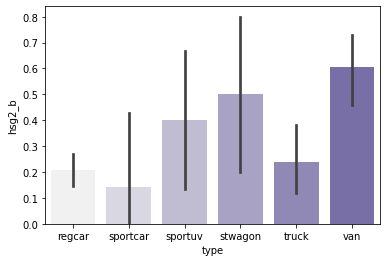

In [113]:
# cat_df = pd.DataFrame({ "hsg2": Y["hsg2"].map(lambda a: a == 1), "size": X_cat.cat.as_ordered()})

Xs = ["size", "type", "fuel"]


reg_box_plot(df, y="hsg2_b", ylabel="Ratio of Household Size > 2")
reg_box_plot(df, y="college_b", ylabel="Ratio of People with college education")

,Unnamed: 0,college,hsg2,coml5,price1,price2,price3,price4,price5,price6,...,pollution5,pollution6,size1,size2,size3,size4,size5,size6,hsg2_b,college_b
Unnamed: 0,1.000000,-0.078023,0.023249,0.064728,0.023759,0.023759,0.048389,0.048389,0.045654,0.045654,...,0.076517,0.076517,-0.080400,-0.080400,0.027103,0.027103,0.061883,0.061883,0.023249,-0.078023
college,-0.078023,1.000000,-0.157409,-0.051215,0.010098,0.010098,-0.047719,-0.047719,-0.006186,-0.006186,...,0.060685,0.060685,-0.025103,-0.025103,-0.064403,-0.064403,-0.100509,-0.100509,-0.157409,1.000000
hsg2,0.023249,-0.157409,1.000000,-0.073576,-0.038768,-0.038768,-0.064677,-0.064677,-0.045665,-0.045665,...,-0.074842,-0.074842,0.102080,0.102080,0.148729,0.148729,0.022659,0.022659,1.000000,-0.157409
coml5,0.064728,-0.051215,-0.073576,1.000000,0.045029,0.045029,-0.007812,-0.007812,-0.009426,-0.009426,...,-0.134781,-0.134781,0.066264,0.066264,0.040264,0.040264,-0.002766,-0.002766,-0.073576,-0.051215
price1,0.023759,0.010098,-0.038768,0.045029,1.000000,1.000000,0.870948,0.870948,0.859647,0.859647,...,0.015630,0.015630,-0.057032,-0.057032,-0.037629,-0.037629,0.086249,0.086249,-0.038768,0.010098
price2,0.023759,0.010098,-0.038768,0.045029,1.000000,1.000000,0.870948,0.870948,0.859647,0.859647,...,0.015630,0.015630,-0.057032,-0.057032,-0.037629,-0.037629,0.086249,0.086249,-0.038768,0.010098
price3,0.048389,-0.047719,-0.064677,-0.007812,0.870948,0.870948,1.000000,1.000000,0.860674,0.860674,...,0.006588,0.006588,-0.052045,-0.052045,-0.036374,-0.036374,0.064319,0.064319,-0.064677,-0.047719
price4,0.048389,-0.047719,-0.064677,-0.007812,0.870948,0.870948,1.000000,1.000000,0.860674,0.860674,...,0.006588,0.006588,-0.052045,-0.052045,-0.036374,-0.036374,0.064319,0.064319,-0.064677,-0.047719
price5,0.045654,-0.006186,-0.045665,-0.009426,0.859647,0.859647,0.860674,0.860674,1.000000,1.000000,...,0.028262,0.028262,-0.067695,-0.067695,-0.094017,-0.094017,0.112036,0.112036,-0.045665,-0.006186
price6,0.045654,-0.006186,-0.045665,-0.009426,0.859647,0.859647,0.860674,0.860674,1.000000,1.000000,...,0.028262,0.028262,-0.067695,-0.067695,-0.094017,-0.094017,0.112036,0.112036,-0.045665,-0.006186


In [106]:
# sns.heatmap()
reduced = df[["hsg2_b", "college_b", "size", "type", "fuel"]]
reduced.corr(method="kendall")
df.corr()

,Unnamed: 0,college,hsg2,coml5,price1,price2,price3,price4,price5,price6,...,pollution5,pollution6,size1,size2,size3,size4,size5,size6,hsg2_b,college_b
Unnamed: 0,1.000000,-0.078023,0.023249,0.064728,0.023759,0.023759,0.048389,0.048389,0.045654,0.045654,...,0.076517,0.076517,-0.080400,-0.080400,0.027103,0.027103,0.061883,0.061883,0.023249,-0.078023
college,-0.078023,1.000000,-0.157409,-0.051215,0.010098,0.010098,-0.047719,-0.047719,-0.006186,-0.006186,...,0.060685,0.060685,-0.025103,-0.025103,-0.064403,-0.064403,-0.100509,-0.100509,-0.157409,1.000000
hsg2,0.023249,-0.157409,1.000000,-0.073576,-0.038768,-0.038768,-0.064677,-0.064677,-0.045665,-0.045665,...,-0.074842,-0.074842,0.102080,0.102080,0.148729,0.148729,0.022659,0.022659,1.000000,-0.157409
coml5,0.064728,-0.051215,-0.073576,1.000000,0.045029,0.045029,-0.007812,-0.007812,-0.009426,-0.009426,...,-0.134781,-0.134781,0.066264,0.066264,0.040264,0.040264,-0.002766,-0.002766,-0.073576,-0.051215
price1,0.023759,0.010098,-0.038768,0.045029,1.000000,1.000000,0.870948,0.870948,0.859647,0.859647,...,0.015630,0.015630,-0.057032,-0.057032,-0.037629,-0.037629,0.086249,0.086249,-0.038768,0.010098
price2,0.023759,0.010098,-0.038768,0.045029,1.000000,1.000000,0.870948,0.870948,0.859647,0.859647,...,0.015630,0.015630,-0.057032,-0.057032,-0.037629,-0.037629,0.086249,0.086249,-0.038768,0.010098
price3,0.048389,-0.047719,-0.064677,-0.007812,0.870948,0.870948,1.000000,1.000000,0.860674,0.860674,...,0.006588,0.006588,-0.052045,-0.052045,-0.036374,-0.036374,0.064319,0.064319,-0.064677,-0.047719
price4,0.048389,-0.047719,-0.064677,-0.007812,0.870948,0.870948,1.000000,1.000000,0.860674,0.860674,...,0.006588,0.006588,-0.052045,-0.052045,-0.036374,-0.036374,0.064319,0.064319,-0.064677,-0.047719
price5,0.045654,-0.006186,-0.045665,-0.009426,0.859647,0.859647,0.860674,0.860674,1.000000,1.000000,...,0.028262,0.028262,-0.067695,-0.067695,-0.094017,-0.094017,0.112036,0.112036,-0.045665,-0.006186
price6,0.045654,-0.006186,-0.045665,-0.009426,0.859647,0.859647,0.860674,0.860674,1.000000,1.000000,...,0.028262,0.028262,-0.067695,-0.067695,-0.094017,-0.094017,0.112036,0.112036,-0.045665,-0.006186
